In [2]:
from __future__ import print_function

In [3]:
from pylab import *
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy

import obspy
from obspy.imaging.cm import obspy_sequential, pqlx #colormaps
from obspy.signal.tf_misfit import cwt

# 2003 Tokachi-oki Tsunami
## PG1

In [4]:
d = loadtxt('kpg1.tp.txt')
t0 = 17416.
t = (d[:,0] - t0) # seconds post event
dt = 0.1

In [5]:
kmean = where(logical_and(t>-3, t<0))[0]
pmean = mean(d[kmean,1])
print('pmean = %g, mean(d[:,1]) = %g' % (pmean,mean(d[:,1])))

pmean = 2.30335e+07, mean(d[:,1]) = 2.30272e+07


In [6]:
p = (d[:,1] - pmean) / (9.81*1025)  # excess pressure in m sea water

Text(0, 0.5, 'Excess pressure (meters of sea water)')

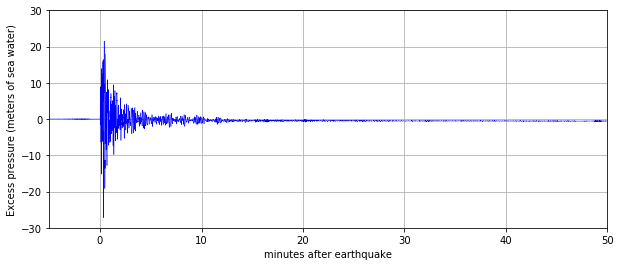

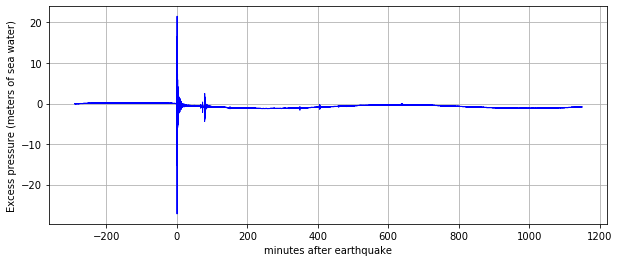

In [7]:
figure(1, figsize=(10,4))
clf()
plot(t/60.,p,'b',linewidth=0.5)
xlim(-5,50)
ylim(-30,30)
grid(True)
xlabel('minutes after earthquake')
ylabel('Excess pressure (meters of sea water)')

figure(2, figsize=(10,4))
clf()
plot(t/60.,p,'b',linewidth=1.0)

grid(True)
xlabel('minutes after earthquake')
ylabel('Excess pressure (meters of sea water)')

Text(0, 0.5, 'Excess pressure (meters of sea water)')

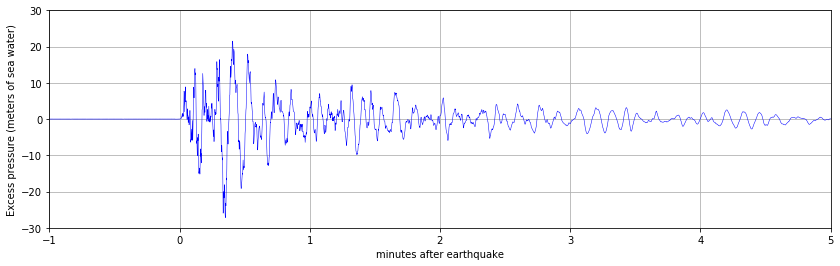

In [8]:
figure(1, figsize=(14,4))
clf()
plot(t[173560:177161]/60.,p[173560:177161],'b',linewidth=0.5)
xlim(-1,5)
ylim(-30,30)
grid(True)
xlabel('minutes after earthquake')
ylabel('Excess pressure (meters of sea water)')

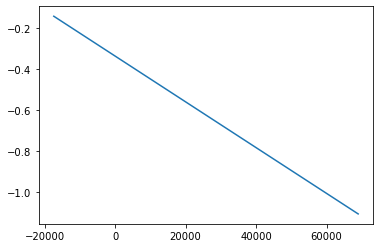

In [9]:
#detrending the data
poly = numpy.polyfit(t, p, 1)
dat_notrend = p - numpy.polyval(poly, t)

plt.plot(t,numpy.polyval(poly,t))

In [10]:
#truncating the data for the spectrogram
dat_trunc = dat_notrend[174160:180161]
t_trunc = t[174160:180161]

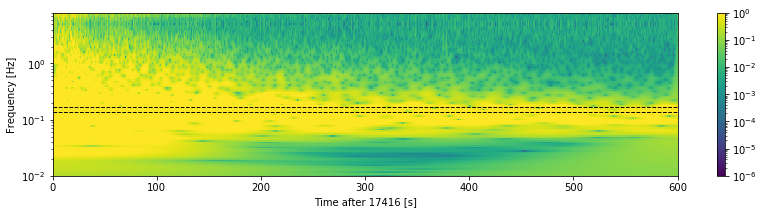

In [11]:
f_min = 0.01
f_max = 8
w0 = 10 #parameter for the wavelet, tradeoff between time and frequency resolution

scalogram = cwt(dat_trunc, dt, w0, f_min, f_max)

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(111)

x, y = np.meshgrid(t_trunc,np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))
scalonorm = np.abs(scalogram)/np.amax(abs(scalogram)) #normalize scalogram

p1 = ax.pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential, norm=colors.LogNorm(vmin=1e-6, vmax=1))

#dotted lines corresponding to the frequencies
plt.axhline(y=0.165,color='black',ls='--',lw=1) 
plt.axhline(y=0.138,color='black',ls='--',lw=1) 

ax.set_xlabel("Time after 17416 [s]")
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)
plt.colorbar(p1)

Text(0, 0.5, 'meters')

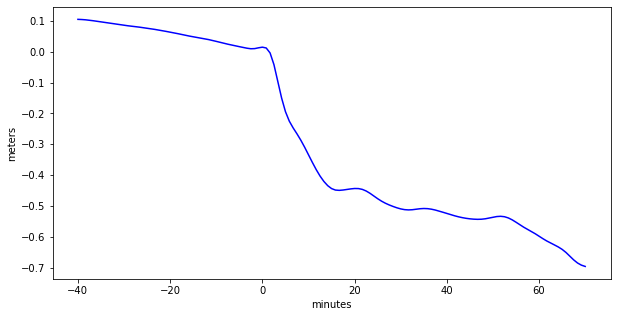

In [12]:
# plot running average over window
j = where(logical_and(t>=-40*60,t<=70*60))[0]
tt = t[j] 
pp = p[j]
# depth = 2283m = 1.522 sec, dt= 0.1 sec, 1.522*10=15.22

width = 10**-4 #width of gaussian

#gaussian
tts = tt-min(tt)
t_incr = arange(min(tts),max(tts)+1,50)
pw = zeros(len(t_incr))

for jj in range(0,len(t_incr)):
    window = np.exp(-width*np.power((tts-t_incr[jj]),2));
    windowed = np.multiply(pp,window)
    
    pw[jj] = sum(windowed)/sum(window)

plt.figure(figsize=(10,5))
plot((t_incr+min(tt))/60., pw,'b')    

xlabel('minutes')
ylabel('meters')


## PG2

In [13]:
d2 = loadtxt('kpg2.tp.txt')
t20 = 17416.
t2 = (d2[:,0] - t20) # seconds post event
dt = 0.1

In [14]:
kmean = where(logical_and(t2>-3, t2<0))[0]
pmean = mean(d2[kmean,1])
print('pmean = %g, mean(d[:,1]) = %g' % (pmean,mean(d2[:,1])))
p2 = (d2[:,1] - pmean) / (9.81*1025)  # excess pressure in m sea water

pmean = 2.25629e+07, mean(d[:,1]) = 2.25592e+07


Text(0, 0.5, 'Excess pressure (meters of sea water)')

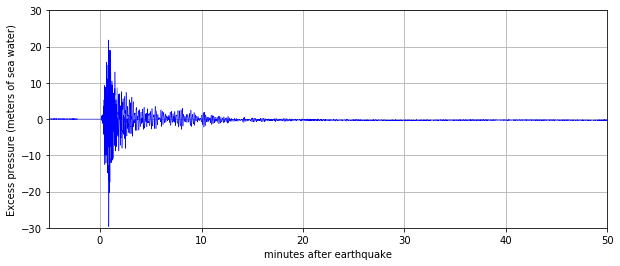

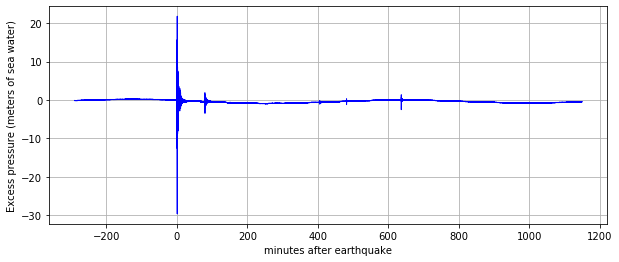

In [15]:
figure(1, figsize=(10,4))
clf()
plot(t2/60.,p2,'b',linewidth=0.5)
xlim(-5,50)
ylim(-30,30)
grid(True)
xlabel('minutes after earthquake')
ylabel('Excess pressure (meters of sea water)')

figure(2, figsize=(10,4))
clf()
plot(t2/60.,p2,'b',linewidth=1.0)

grid(True)
xlabel('minutes after earthquake')
ylabel('Excess pressure (meters of sea water)')

Text(0, 0.5, 'Excess pressure (meters of sea water)')

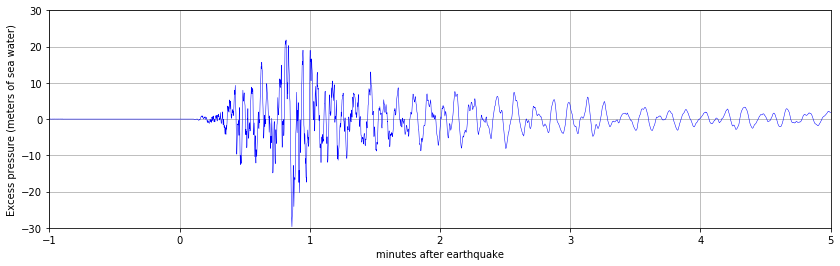

In [16]:
figure(1, figsize=(14,4))
clf()
plot(t2[173560:177161]/60.,p2[173560:177161],'b',linewidth=0.5)
xlim(-1,5)
ylim(-30,30)
grid(True)
xlabel('minutes after earthquake')
ylabel('Excess pressure (meters of sea water)')

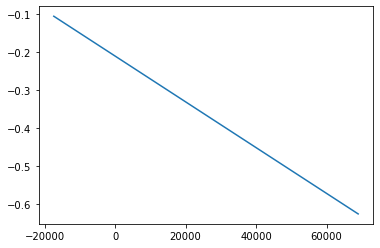

In [17]:
#detrending the data
poly = numpy.polyfit(t2, p2, 1)
dat_notrend2 = p2 - numpy.polyval(poly, t2)

plt.plot(t2,numpy.polyval(poly,t2))

In [18]:
#truncating the data for the spectrogram
dat_trunc2 = dat_notrend2[174160:180161]
t_trunc2 = t2[174160:180161]

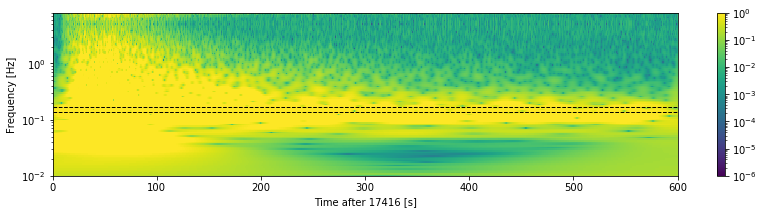

In [19]:
f_min = 0.01
f_max = 8
w0 = 10 #parameter for the wavelet, tradeoff between time and frequency resolution

scalogram = cwt(dat_trunc2, dt, w0, f_min, f_max)

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(111)

x, y = np.meshgrid(t_trunc2,np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))
scalonorm = np.abs(scalogram)/np.amax(abs(scalogram)) #normalize scalogram

p1 = ax.pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential, norm=colors.LogNorm(vmin=1e-6, vmax=1))

#dotted lines corresponding to the frequencies
plt.axhline(y=0.165,color='black',ls='--',lw=1) 
plt.axhline(y=0.138,color='black',ls='--',lw=1) 

ax.set_xlabel("Time after 17416 [s]")
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)
plt.colorbar(p1)

Text(0, 0.5, 'meters')

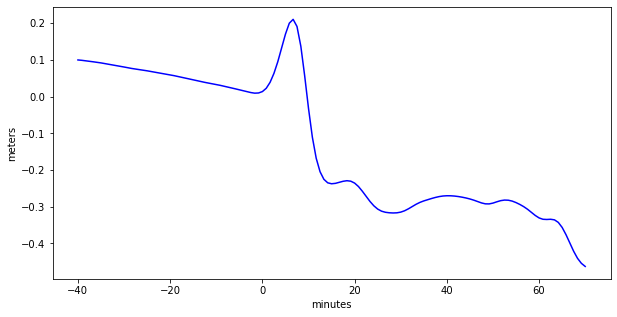

In [22]:
# plot running average over window
j = where(logical_and(t2>=-40*60,t2<=70*60))[0]
tt = t2[j] 
pp = p2[j]
# depth = 2283m = 1.522 sec, dt= 0.1 sec, 1.522*10=15.22

width = 10**-4 #width of gaussian

#gaussian
tts = tt-min(tt)
t_incr = arange(min(tts),max(tts)+1,50)
pw = zeros(len(t_incr))

for jj in range(0,len(t_incr)):
    window = np.exp(-width*np.power((tts-t_incr[jj]),2));
    windowed = np.multiply(pp,window)
    
    pw[jj] = sum(windowed)/sum(window)

plt.figure(figsize=(10,5))
plot((t_incr+min(tt))/60., pw,'b')    

xlabel('minutes')
ylabel('meters')


## 2018-11-30 M7.1 Alaska

### LDH